# Huber Regression

Huber regression is a type of robust regression that is aware of the possibility of outliers in a dataset and assigns them less weight than other examples in the dataset.

In [1]:
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

In [4]:
seed(1)

X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)

# add some artificial outliers
for i in range(10):
  factor = randint(2, 4)
  if random() > 0.5:
    X[i] += factor * X.std()
  else:
    X[i] -= factor * X.std()

In [5]:
model = HuberRegressor()

In [6]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
absolute(scores)

array([ 1.88276849,  2.45933688,  5.60101263,  2.73172051,  2.81477183,
        5.82521838,  6.72004077,  4.04016646,  5.18093673,  6.93534549,
        6.54351454,  7.35362317,  5.29808916,  2.72413782,  1.54843347,
        4.10869555,  2.52664468,  2.57506051,  2.14071723, 10.31102346,
        4.86895247,  3.99275538,  4.23946645,  4.48029997,  4.91715207,
        4.30800077,  3.88028201,  3.9786849 ,  4.71171254,  4.34326259])

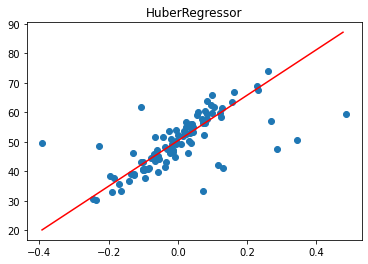

In [7]:
# fut the model on all data
model.fit(X, y)
# plot the dataset
pyplot.scatter(X, y)
# plot the line of best fit
xaxis = arange(X.min(), X.max(), 0.01)
yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
pyplot.plot(xaxis, yaxis, color='r')
# show the plot
pyplot.title(type(model).__name__)
pyplot.show()